In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [20]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [6]:
x_valid.shape

(5000, 32, 32, 3)

In [7]:
x_train.shape

(45000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

Text(0.5, 1.0, '3')

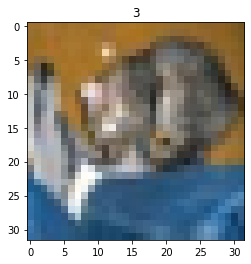

In [13]:
plt.imshow(x_test[0])
plt.title(y_test[0][0])

In [14]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)

In [1]:
# 定义卷积神经网络.
model = tf.keras.models.Sequential()
# 2次卷积, 一次池化, 总共3层. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 展平
model.add(tf.keras.layers.Flatten())
# 全连接
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


NameError: name 'tf' is not defined

In [17]:
# 配置网络
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['acc'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [22]:
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 23s 7ms/step - loss: 2.0446 - acc: 0.2523 - val_loss: 1.5073 - val_acc: 0.4620
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4460 - acc: 0.4779 - val_loss: 1.3928 - val_acc: 0.4978
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2067 - acc: 0.5725 - val_loss: 1.2788 - val_acc: 0.5326
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0413 - acc: 0.6353 - val_loss: 1.0222 - val_acc: 0.6352
Epoch 5/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8863 - acc: 0.6892 - val_loss: 0.9801 - val_acc: 0.6566
Epoch 6/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7900 - acc: 0.7238 - val_loss: 1.1513 - val_acc: 0.6224
Epoch 7/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6945 - acc: 0.7588 - val_loss: 1.0648 - val_acc: 0.6648
Epoch 8/10
1407/1407 [==============================] - 9s 6m

In [24]:
history.history

{'loss': [1.8281360864639282,
  1.3848625421524048,
  1.1676044464111328,
  1.0064343214035034,
  0.8828362822532654,
  0.7799011468887329,
  0.696526050567627,
  0.6166756749153137,
  0.5386707782745361,
  0.47219154238700867],
 'acc': [0.33882221579551697,
  0.5040444731712341,
  0.5877777934074402,
  0.6477555632591248,
  0.6919999718666077,
  0.7274444699287415,
  0.7585333585739136,
  0.78493332862854,
  0.8118444681167603,
  0.8349999785423279],
 'val_loss': [1.5073190927505493,
  1.392819881439209,
  1.278789758682251,
  1.0222294330596924,
  0.9801304936408997,
  1.151273488998413,
  1.0647720098495483,
  0.9035186767578125,
  0.9659541845321655,
  0.7779567241668701],
 'val_acc': [0.4620000123977661,
  0.49779999256134033,
  0.5325999855995178,
  0.635200023651123,
  0.6565999984741211,
  0.6223999857902527,
  0.6647999882698059,
  0.6845999956130981,
  0.6901999711990356,
  0.7455999851226807]}

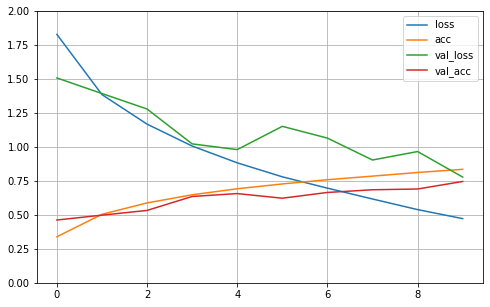

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 2)
plt.show()

In [31]:
# 加入dropout减轻过拟合现象.
model = tf.keras.models.Sequential()
# 2次卷积, 一次池化, 总共3层. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 展平
model.add(tf.keras.layers.Flatten())
# 全连接
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0416 - acc: 0.2821 - val_loss: 1.4422 - val_acc: 0.5498
Epoch 2/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1730 - acc: 0.5812 - val_loss: 1.1576 - val_acc: 0.6530
Epoch 3/10
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9152 - acc: 0.6794 - val_loss: 0.8822 - val_acc: 0.7354
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7615 - acc: 0.7283 - val_loss: 0.7998 - val_acc: 0.7612
Epoch 5/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6454 - acc: 0.7755 - val_loss: 0.8090 - val_acc: 0.7732
Epoch 6/10
1407/1407 [==============================] - 9s 7ms/step - loss: 0.5455 - acc: 0.8102 - val_loss: 0.8505 - val_acc: 0.7812
Epoch 7/10
1407/1407 [==============================] - 9s 7ms/step - loss: 0.4962 - acc: 0.8244 - val_loss: 0.8744 - val_acc: 0.7798
Epoch 8/10
1407/1407 [==============================] - 9s 7m

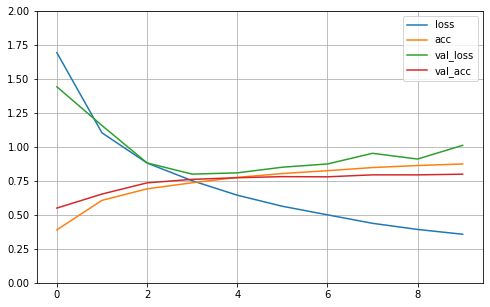

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 2)
plt.show()